In [1]:
import numpy as np
from lib.envs.windy_gridworld import WindyGridworldEnv
from lib import plotting 
from collections import defaultdict
import itertools
import sys

# 1) Get familiar with the Windy Gridworld Playground

In [2]:
grid_env = WindyGridworldEnv()

In [3]:
grid_env.render()

o  o  o  o  o  o  o  o  o  o
o  o  o  o  o  o  o  o  o  o
o  o  o  o  o  o  o  o  o  o
x  o  o  o  o  o  o  T  o  o
o  o  o  o  o  o  o  o  o  o
o  o  o  o  o  o  o  o  o  o
o  o  o  o  o  o  o  o  o  o



### Right

In [4]:
grid_env.step(1)

(31, -1.0, False, {'prob': 1.0})

In [5]:
grid_env.render()

o  o  o  o  o  o  o  o  o  o
o  o  o  o  o  o  o  o  o  o
o  o  o  o  o  o  o  o  o  o
o  x  o  o  o  o  o  T  o  o
o  o  o  o  o  o  o  o  o  o
o  o  o  o  o  o  o  o  o  o
o  o  o  o  o  o  o  o  o  o



### Left

In [6]:
grid_env.step(3)

(30, -1.0, False, {'prob': 1.0})

In [7]:
grid_env.render()

o  o  o  o  o  o  o  o  o  o
o  o  o  o  o  o  o  o  o  o
o  o  o  o  o  o  o  o  o  o
x  o  o  o  o  o  o  T  o  o
o  o  o  o  o  o  o  o  o  o
o  o  o  o  o  o  o  o  o  o
o  o  o  o  o  o  o  o  o  o



### Upper

In [8]:
grid_env.step(0)

(20, -1.0, False, {'prob': 1.0})

In [9]:
grid_env.render()

o  o  o  o  o  o  o  o  o  o
o  o  o  o  o  o  o  o  o  o
x  o  o  o  o  o  o  o  o  o
o  o  o  o  o  o  o  T  o  o
o  o  o  o  o  o  o  o  o  o
o  o  o  o  o  o  o  o  o  o
o  o  o  o  o  o  o  o  o  o



### Bottom

In [10]:
grid_env.step(2)

(30, -1.0, False, {'prob': 1.0})

In [11]:
grid_env.render()

o  o  o  o  o  o  o  o  o  o
o  o  o  o  o  o  o  o  o  o
o  o  o  o  o  o  o  o  o  o
x  o  o  o  o  o  o  T  o  o
o  o  o  o  o  o  o  o  o  o
o  o  o  o  o  o  o  o  o  o
o  o  o  o  o  o  o  o  o  o



In [12]:
grid_env.observation_space

Discrete(70)

In [13]:
grid_env.action_space

Discrete(4)

In [14]:
grid_env.action_space.sample()

1

In [15]:
grid_env.observation_space.sample()

31

In [16]:
mapping_actions = {
    0 : "upper",
    1 : "right",
    2: "bottom",
    3: "left"
}

In [17]:
a = grid_env.action_space.sample()

In [18]:
a

1

In [19]:
mapping_actions[a]

'right'

# 2) Implement SARSA

In [20]:
def make_epsilon_greedy_policy(Q, epsilon, nA):
    """
    Creates an epsilon-greedy policy based on a given Q-function and epsilon.
    
    Args:
        Q: A dictionary that maps from state -> action-values.
            Each value is a numpy array of length nA (see below)
        epsilon: The probability to select a random action . float between 0 and 1.
        nA: Number of actions in the environment.
    
    Returns:
        A function that takes the observation as an argument and returns
        the probabilities for each action in the form of a numpy array of length nA.
    
    """
    def policy_fn(observation):
        A = np.ones(nA, dtype=float) * epsilon / nA
        best_action = np.argmax(Q[observation])
        A[best_action] += (1.0 - epsilon)
        return A
    return policy_fn

In [21]:
def sarsa(env, num_episodes, discount_factor=1.0, alpha=0.5, epsilon=0.1):
    """
    SARSA algorithm: On-policy TD control. Finds the optimal epsilon-greedy policy.
    
    Args:
        env: OpenAI environment.
        num_episodes: Number of episodes to run for.
        discount_factor: Gamma discount factor.
        alpha: TD learning rate.
        epsilon: Chance the sample a random action. Float betwen 0 and 1.
    
    Returns:
        A tuple (Q, stats).
        Q is the optimal action-value function, a dictionary mapping state -> action values.
        stats is an EpisodeStats object with two numpy arrays for episode_lengths and episode_rewards.
    """
    
    # The final action-value function.
    # A nested dictionary that maps state -> (action -> action-value).
    Q = defaultdict(lambda: np.zeros(env.action_space.n))
    
    # Keeps track of useful statistics
    stats = plotting.EpisodeStats(
        episode_lengths=np.zeros(num_episodes),
        episode_rewards=np.zeros(num_episodes))

    # The policy we're following
    policy = make_epsilon_greedy_policy(Q, epsilon, env.action_space.n)
    



    for i_episode in range(num_episodes):
        # Print out which episode we're on, useful for debugging.
        if (i_episode + 1) % 100 == 0:
            print("\rEpisode {}/{}.".format(i_episode + 1, num_episodes), end="")
            sys.stdout.flush()

        state = env.reset()
        action = np.random.choice(np.arange(len(policy(state))), p = policy(state))
        done = False
        while not done:
            next_state, reward, done, _ = grid_env.step(action)
            next_action = np.random.choice(np.arange(len(policy(next_state))), p = policy(next_state))

            Q[state][action] += alpha*(reward + discount_factor * Q[next_state][next_action] - Q[state][action])
            state = next_state
            action = next_action

            stats.episode_lengths[i_episode] += 1
            stats.episode_rewards[i_episode] += reward

    return Q, stats

In [22]:
Q, stats = sarsa(grid_env, 200)

Episode 200/200.

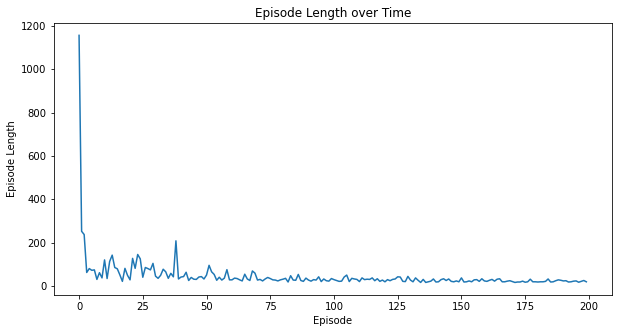

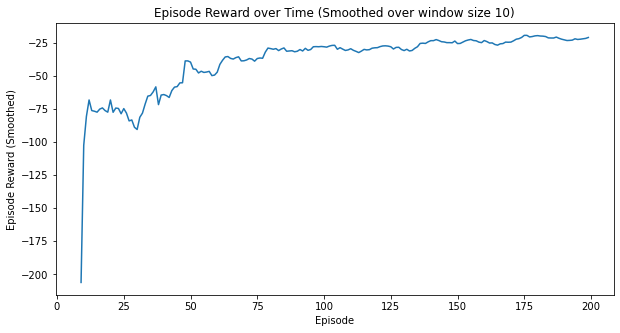

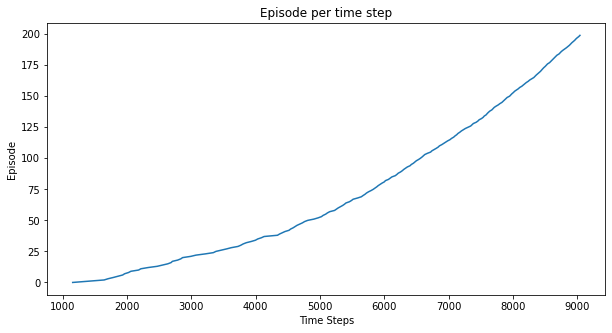

In [23]:
plotting.plot_episode_stats(stats);